In [49]:
import numpy as np
import pandas as pd
import os

In [50]:
# Load recipes data

data_folder = './data'
recipes_file = 'recipes.parquet'

data = pd.read_parquet(os.path.join(data_folder, recipes_file))
data.head(5)

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,..."


In [51]:
# Select appropriate columns

print('All columns:', data.columns.to_list())

required_columns = ['RecipeId', 'CookTime', 'PrepTime', 'TotalTime', 'RecipeCategory',
                    'AggregatedRating', 'ReviewCount', 'Calories', 
                    'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 
                    'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

data = data[required_columns]

# Remove rows with missing values

print('Number of rows:', len(data))
print('Number of rows without None values:', len(data.dropna()))

data = data.dropna()

data.head(5)

All columns: ['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime', 'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeYield', 'RecipeInstructions']
Number of rows: 522517
Number of rows without None values: 226272


,RecipeId,CookTime,PrepTime,TotalTime,RecipeCategory,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,38.0,PT24H,PT45M,PT24H45M,Frozen Desserts,4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2
1,39.0,PT25M,PT4H,PT4H25M,Chicken Breast,3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4
2,40.0,PT5M,PT30M,PT35M,Beverages,4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3
3,41.0,PT20M,PT24H,PT24H20M,Soy/Tofu,4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3
4,42.0,PT30M,PT20M,PT50M,Vegetable,4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3


In [52]:
def timestring_to_minutes(timestring):
    """
    Convert the timestring in the columns 'CookTime', 'PrepTime' or 'TotalTime' to minutes.
    Example: 'PT24H45M' -> 24 * 60 + 45
    
    Args:
        timestring (str): String indicating a time duration
        
    Returns:
        total_time (float): Number of minutes
    """
    if type(timestring) is str:
        # Remove leading 'PT'
        timestring = timestring.replace('PT', '')
        
        # Determine the number of hours from the remaining string before 'H'
        if 'H' in timestring:
            timestring_h = timestring.split('H')
            hours = int(timestring_h[0])
            
            # Consider only the part after 'H' for the minutes
            timestring = timestring_h[1]
        else:
            hours = 0
            
        # Determine the number of minutes from the remaining string before 'M'
        if 'M' in timestring:
            minutes = int(timestring.split('M')[0])
        else:
            minutes = 0
        
        # Calculate the total time duration in minutes
        total_time = hours * 60 + minutes
        return total_time
    else:
        return None

data['CookTime'] = data['CookTime'].map(timestring_to_minutes)
data['PrepTime'] = data['PrepTime'].map(timestring_to_minutes)
data['TotalTime'] = data['TotalTime'].map(timestring_to_minutes)
data = data.astype({'RecipeId': 'int32', 'CookTime': 'int32',
                    'PrepTime': 'int32', 'TotalTime': 'int32'})

print(data.dtypes)
data.head(5)

RecipeId                 int32
CookTime                 int32
PrepTime                 int32
TotalTime                int32
RecipeCategory          object
AggregatedRating       float64
ReviewCount            float64
Calories               float64
FatContent             float64
SaturatedFatContent    float64
CholesterolContent     float64
SodiumContent          float64
CarbohydrateContent    float64
FiberContent           float64
SugarContent           float64
ProteinContent         float64
dtype: object


,RecipeId,CookTime,PrepTime,TotalTime,RecipeCategory,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,38,1440,45,1485,Frozen Desserts,4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2
1,39,25,240,265,Chicken Breast,3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4
2,40,5,30,35,Beverages,4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3
3,41,20,1440,1460,Soy/Tofu,4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3
4,42,30,20,50,Vegetable,4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3


In [53]:
# Look at recipe categories

unique_categories = data['RecipeCategory'].unique()

# Remove 'None' from the categories
unique_categories = unique_categories[unique_categories != np.array(None)]

print('Number of unique categories:', len(unique_categories))
print(data['RecipeCategory'].value_counts())

Number of unique categories: 285
Dessert             25307
One Dish Meal       17087
Lunch/Snacks        14709
Vegetable           12793
Breakfast           10133
                    ...  
Oysters                 1
Ecuadorean              1
Dairy Free Foods        1
Summer Dip              1
Baking                  1
Name: RecipeCategory, Length: 285, dtype: int64


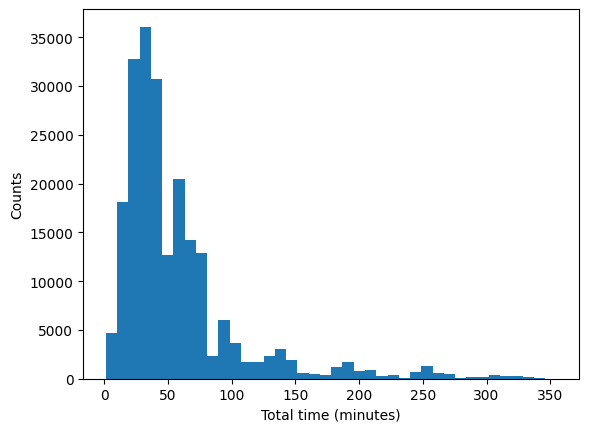

In [54]:
# Plot (part of) distribution of total time

import matplotlib.pyplot as plt

plt.hist(data[data['TotalTime'] < 6 * 60]['TotalTime'], bins=40)
plt.ylabel('Counts')
plt.xlabel('Total time (minutes)')
plt.show()